In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


Importing dataset

In [2]:
data = pd.read_csv(r"C:\Users\KSJEV\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,tenure,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age
0,7590-VHVEG,Female,1,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,78
1,5575-GNVDE,Male,34,DSL,No,One year,No,Mailed check,56.95,1889.5,No,74
2,3668-QPYBK,Male,2,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,71
3,7795-CFOCW,Male,45,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No,78
4,9237-HQITU,Female,2,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,80


In [3]:
data.tail()

,customerID,gender,tenure,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age
4995,7912-SYRQT,Female,7,Fiber optic,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes,33
4996,3557-HTYWR,Female,47,DSL,Yes,Two year,No,Mailed check,74.05,3496.3,No,44
4997,4816-JBHOV,Male,2,DSL,No,Month-to-month,Yes,Electronic check,44.70,93.7,Yes,22
4998,8920-NAVAY,Male,62,Fiber optic,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No,23
4999,1699-TLDLZ,Female,16,No,No internet service,Two year,No,Mailed check,19.70,301.55,No,29


In [4]:
data.describe()

,tenure,MonthlyCharges,Age
count,5000.000000,5000.000000,5000.000000
mean,32.257600,64.781770,48.611600
std,24.635483,30.141924,17.576317
min,0.000000,18.250000,19.000000
25%,8.000000,35.487500,34.000000
50%,29.000000,70.400000,48.000000
75%,55.250000,89.950000,63.000000
max,72.000000,118.750000,80.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5000 non-null   object 
 1   gender            5000 non-null   object 
 2   tenure            5000 non-null   int64  
 3   InternetService   5000 non-null   object 
 4   TechSupport       5000 non-null   object 
 5   Contract          5000 non-null   object 
 6   PaperlessBilling  5000 non-null   object 
 7   PaymentMethod     5000 non-null   object 
 8   MonthlyCharges    5000 non-null   float64
 9   TotalCharges      5000 non-null   object 
 10  Churn             5000 non-null   object 
 11  Age               5000 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 468.9+ KB


Calculating Customer lifetime value

In [6]:
data['Churn']=data['Churn'].map({'Yes':1,'No':0})
churn_rate=data['Churn'].mean()
customer_lifetime=1/churn_rate
gross_margin=0.70   #Assumption
data['customer lifetime value']=data['MonthlyCharges']*customer_lifetime*gross_margin
print(data[['customerID','customer lifetime value']].head())

   customerID  customer lifetime value
0  7590-VHVEG                79.569688
1  5575-GNVDE               151.808835
2  3668-QPYBK               143.545316
3  7795-CFOCW               112.757045
4  9237-HQITU               188.461538


In [7]:
data.head()

,customerID,gender,tenure,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age,customer lifetime value
0,7590-VHVEG,Female,1,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,78,79.569688
1,5575-GNVDE,Male,34,DSL,No,One year,No,Mailed check,56.95,1889.5,0,74,151.808835
2,3668-QPYBK,Male,2,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,71,143.545316
3,7795-CFOCW,Male,45,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0,78,112.757045
4,9237-HQITU,Female,2,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,80,188.461538


Calculation average monthly charge

In [53]:
average_monthlycharge=data['MonthlyCharges'].mean()
print(f"average monthly charge: ${average_monthlycharge:.2f}")

average monthly charge: $64.78


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               5000 non-null   object 
 1   gender                   5000 non-null   object 
 2   tenure                   5000 non-null   int64  
 3   InternetService          5000 non-null   object 
 4   TechSupport              5000 non-null   object 
 5   Contract                 5000 non-null   object 
 6   PaperlessBilling         5000 non-null   object 
 7   PaymentMethod            5000 non-null   object 
 8   MonthlyCharges           5000 non-null   float64
 9   TotalCharges             5000 non-null   object 
 10  Churn                    5000 non-null   int64  
 11  Age                      5000 non-null   int64  
 12  customer lifetime value  5000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 507.9+ KB


In [10]:
analyzed_data = data.copy()

analyzed_data['TotalCharges'] = pd.to_numeric(analyzed_data['TotalCharges'], errors='coerce')
analyzed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               5000 non-null   object 
 1   gender                   5000 non-null   object 
 2   tenure                   5000 non-null   int64  
 3   InternetService          5000 non-null   object 
 4   TechSupport              5000 non-null   object 
 5   Contract                 5000 non-null   object 
 6   PaperlessBilling         5000 non-null   object 
 7   PaymentMethod            5000 non-null   object 
 8   MonthlyCharges           5000 non-null   float64
 9   TotalCharges             4992 non-null   float64
 10  Churn                    5000 non-null   int64  
 11  Age                      5000 non-null   int64  
 12  customer lifetime value  5000 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 507.9+ KB


In [11]:
analyzed_data.head()

,customerID,gender,tenure,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age,customer lifetime value
0,7590-VHVEG,Female,1,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,78,79.569688
1,5575-GNVDE,Male,34,DSL,No,One year,No,Mailed check,56.95,1889.50,0,74,151.808835
2,3668-QPYBK,Male,2,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,71,143.545316
3,7795-CFOCW,Male,45,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0,78,112.757045
4,9237-HQITU,Female,2,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,80,188.461538


In [12]:
analyzed_data.describe()

,tenure,MonthlyCharges,TotalCharges,Churn,Age,customer lifetime value
count,5000.000000,5000.000000,4992.000000,5000.000000,5000.000000,5000.000000
mean,32.257600,64.781770,2275.162410,0.262600,48.611600,172.685602
std,24.635483,30.141924,2268.920819,0.440091,17.576317,80.347855
min,0.000000,18.250000,18.800000,0.000000,19.000000,48.648134
25%,8.000000,35.487500,387.775000,0.000000,34.000000,94.597296
50%,29.000000,70.400000,1397.475000,0.000000,48.000000,187.661843
75%,55.250000,89.950000,3759.787500,1.000000,63.000000,239.775324
max,72.000000,118.750000,8684.800000,1.000000,80.000000,316.546078


Exploratory Data Analysis (EDA)

In [13]:
gender_distribution = analyzed_data['gender'].value_counts(normalize=True) * 100
print("Gender Distribution:\n", gender_distribution)

Gender Distribution:
 gender
Male      50.66
Female    49.34
Name: proportion, dtype: float64


In [14]:
Contract_Distribution = analyzed_data['Contract'].value_counts(normalize=True) * 100
print("Contract Type Distribution:\n", Contract_Distribution)


Contract Type Distribution:
 Contract
Month-to-month    55.44
Two year          23.94
One year          20.62
Name: proportion, dtype: float64


In [15]:
tech_support_distribution = analyzed_data['TechSupport'].value_counts(normalize=True) * 100
print("Tech Support Distribution:\n", tech_support_distribution)


Tech Support Distribution:
 TechSupport
No                     49.54
Yes                    28.52
No internet service    21.94
Name: proportion, dtype: float64


In [16]:
internet_service_distribution = analyzed_data['InternetService'].value_counts(normalize=True) * 100
print("Internet Service Distribution:\n", internet_service_distribution)

Internet Service Distribution:
 InternetService
Fiber optic    43.82
DSL            34.24
No             21.94
Name: proportion, dtype: float64


In [17]:
PaperlessBilling_distribution = analyzed_data['PaperlessBilling'].value_counts(normalize=True) * 100
print("PaperlessBilling Distribution:\n", PaperlessBilling_distribution)

PaperlessBilling Distribution:
 PaperlessBilling
Yes    59.02
No     40.98
Name: proportion, dtype: float64


In [18]:
PaymentMethod_distribution = analyzed_data['PaymentMethod'].value_counts(normalize=True) * 100
print("PaymentMethod Distribution:\n",PaymentMethod_distribution)

PaymentMethod Distribution:
 PaymentMethod
Electronic check             33.38
Mailed check                 22.72
Bank transfer (automatic)    22.12
Credit card (automatic)      21.78
Name: proportion, dtype: float64


In [19]:
Churn_distribution = analyzed_data['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution:\n",Churn_distribution)

Churn Distribution:
 Churn
0    73.74
1    26.26
Name: proportion, dtype: float64


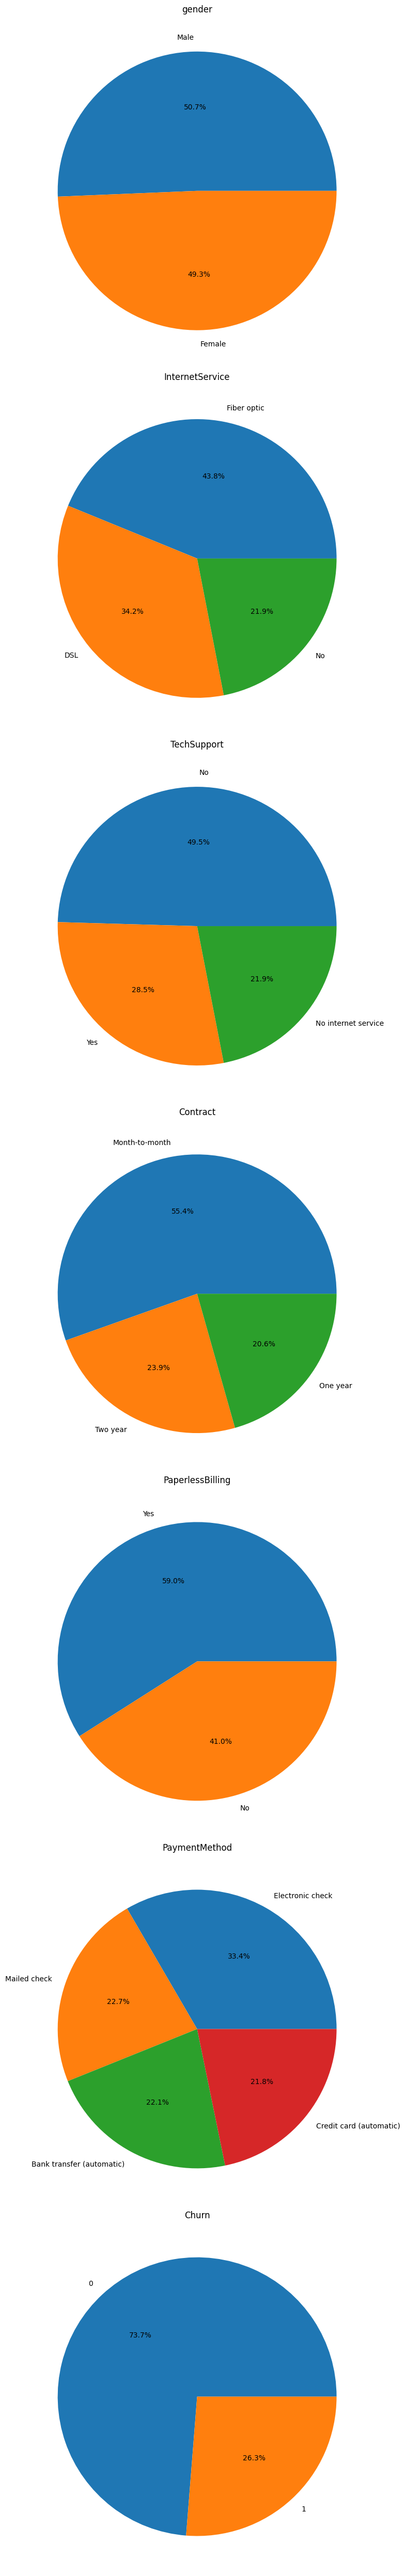

In [20]:
categorical_columns = ['gender', 'InternetService', 'TechSupport','Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

# Set up the subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(50, 50))

# Loop through each column in the DataFrame
for i, col in enumerate(categorical_columns):
    # Create a pie chart for the column
    analyzed_data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')
    
plt.tight_layout()

In [21]:
analyzed_data.nunique()

customerID                 5000
gender                        2
tenure                       73
InternetService               3
TechSupport                   3
Contract                      3
PaperlessBilling              2
PaymentMethod                 4
MonthlyCharges             1438
TotalCharges               4711
Churn                         2
Age                          62
customer lifetime value    1438
dtype: int64

In [22]:
analyzed_data.isnull().sum()

customerID                 0
gender                     0
tenure                     0
InternetService            0
TechSupport                0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               8
Churn                      0
Age                        0
customer lifetime value    0
dtype: int64

In [23]:
analyzed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               5000 non-null   object 
 1   gender                   5000 non-null   object 
 2   tenure                   5000 non-null   int64  
 3   InternetService          5000 non-null   object 
 4   TechSupport              5000 non-null   object 
 5   Contract                 5000 non-null   object 
 6   PaperlessBilling         5000 non-null   object 
 7   PaymentMethod            5000 non-null   object 
 8   MonthlyCharges           5000 non-null   float64
 9   TotalCharges             4992 non-null   float64
 10  Churn                    5000 non-null   int64  
 11  Age                      5000 non-null   int64  
 12  customer lifetime value  5000 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 507.9+ KB


Text(0.5, 1.0, 'Distribution of the total charges')

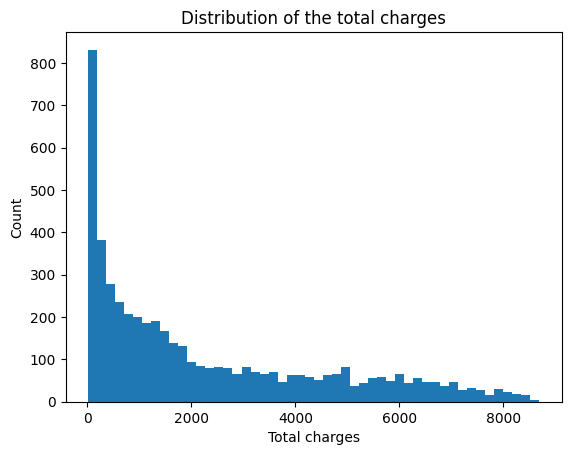

In [24]:
plt.hist(x=analyzed_data["TotalCharges"], bins=50)
plt.xlabel("Total charges")
plt.ylabel("Count")
plt.title("Distribution of the total charges")

In [25]:
analyzed_data.dropna(how = 'any', inplace = True)
# Recheck the missing values of every columns
analyzed_data.isnull().sum()

customerID                 0
gender                     0
tenure                     0
InternetService            0
TechSupport                0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
Age                        0
customer lifetime value    0
dtype: int64

In [26]:
analyzed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               4992 non-null   object 
 1   gender                   4992 non-null   object 
 2   tenure                   4992 non-null   int64  
 3   InternetService          4992 non-null   object 
 4   TechSupport              4992 non-null   object 
 5   Contract                 4992 non-null   object 
 6   PaperlessBilling         4992 non-null   object 
 7   PaymentMethod            4992 non-null   object 
 8   MonthlyCharges           4992 non-null   float64
 9   TotalCharges             4992 non-null   float64
 10  Churn                    4992 non-null   int64  
 11  Age                      4992 non-null   int64  
 12  customer lifetime value  4992 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 546.0+ KB


In [27]:
print(analyzed_data['tenure'].max())

72


In [28]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

analyzed_data['tenure_group'] = pd.cut(analyzed_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [29]:
analyzed_data['tenure_group'].value_counts()

tenure_group
1 - 12     1567
61 - 72    1004
13 - 24     722
25 - 36     593
49 - 60     582
37 - 48     524
Name: count, dtype: int64

In [30]:
analyzed_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
analyzed_data.head()

,gender,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age,customer lifetime value,tenure_group
0,Female,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,78,79.569688,1 - 12
1,Male,DSL,No,One year,No,Mailed check,56.95,1889.50,0,74,151.808835,25 - 36
2,Male,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,71,143.545316,1 - 12
3,Male,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0,78,112.757045,37 - 48
4,Female,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,80,188.461538,1 - 12


Visualization of relationships

In [31]:
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=analyzed_data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [32]:
data.Churn[data.Churn == "No"].groupby(by = data.gender).count()

Series([], Name: Churn, dtype: int64)

In [33]:
data.Churn[data.Churn == "Yes"].groupby(by = data.gender).count()


Series([], Name: Churn, dtype: int64)

In [34]:
data['Churn'].value_counts()

Churn
0    3687
1    1313
Name: count, dtype: int64

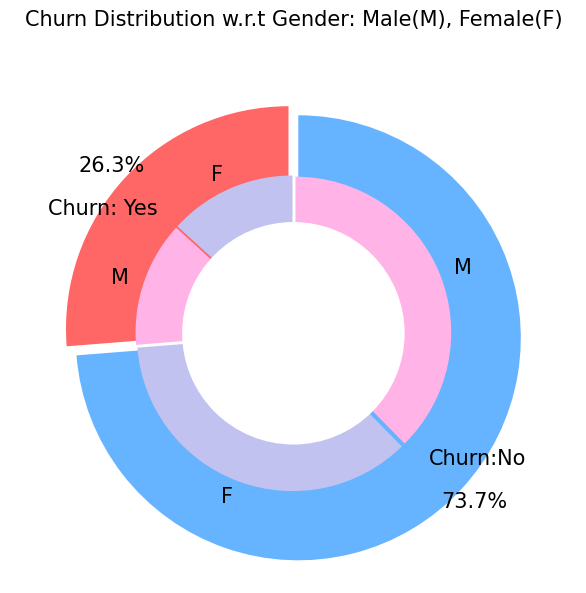

In [35]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1313,3687]
labels_gender = ["F","M","F","M"]
sizes_gender = [662,651,1805,1882]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [36]:
fig = px.histogram(data, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

In [37]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [38]:
data[data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        717
Fiber optic      0        642
No               0        523
Fiber optic      1        449
DSL              1        166
No               1         36
Name: count, dtype: int64

In [39]:
data[data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        674
Fiber optic      0        633
No               0        498
Fiber optic      1        467
DSL              1        155
No               1         40
Name: count, dtype: int64

In [40]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [674,717,155,166],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [633,642,467,449],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [498,523,40,36],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [41]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [42]:
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Text(0.5, 1.0, 'Monthly charges by churn')

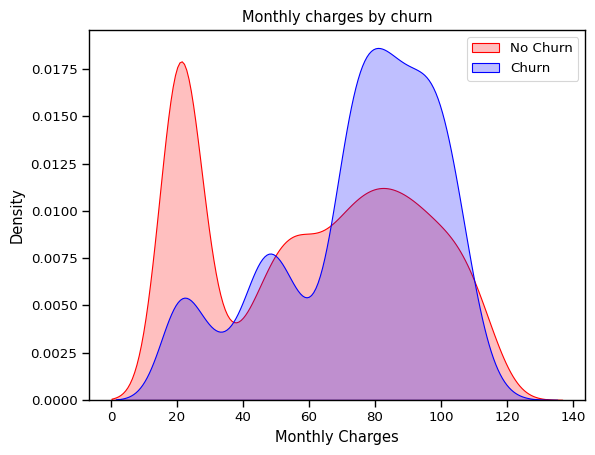

In [51]:
Mth = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

In [44]:
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

In [45]:
analyzed_data.head()

,gender,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age,customer lifetime value,tenure_group
0,Female,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,78,79.569688,1 - 12
1,Male,DSL,No,One year,No,Mailed check,56.95,1889.50,0,74,151.808835,25 - 36
2,Male,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,71,143.545316,1 - 12
3,Male,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0,78,112.757045,37 - 48
4,Female,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,80,188.461538,1 - 12


Encoding categorical features into numerical format.

In [46]:
telco_data_dummies = pd.get_dummies(analyzed_data, dtype=int)
telco_data_dummies.head()

,MonthlyCharges,TotalCharges,Churn,Age,customer lifetime value,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,78,79.569688,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,74,151.808835,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,71,143.545316,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,78,112.757045,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,80,188.461538,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [47]:
telco_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           4992 non-null   float64
 1   TotalCharges                             4992 non-null   float64
 2   Churn                                    4992 non-null   int64  
 3   Age                                      4992 non-null   int64  
 4   customer lifetime value                  4992 non-null   float64
 5   gender_Female                            4992 non-null   int64  
 6   gender_Male                              4992 non-null   int64  
 7   InternetService_DSL                      4992 non-null   int64  
 8   InternetService_Fiber optic              4992 non-null   int64  
 9   InternetService_No                       4992 non-null   int64  
 10  TechSupport_No                           4992 non-nul

<Axes: >

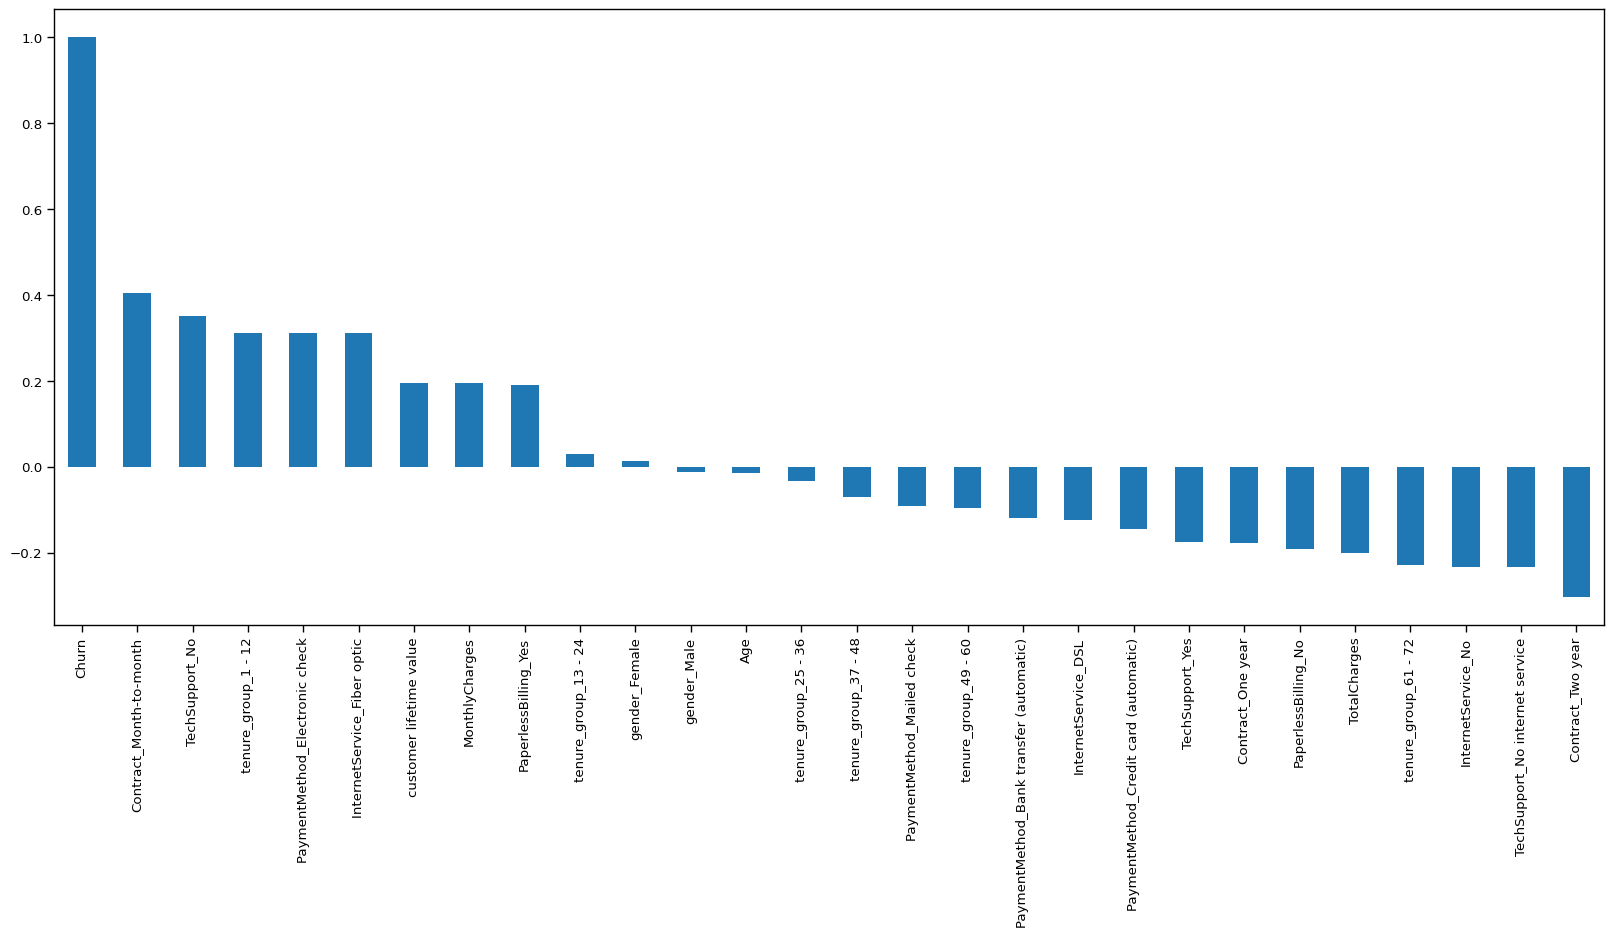

In [48]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

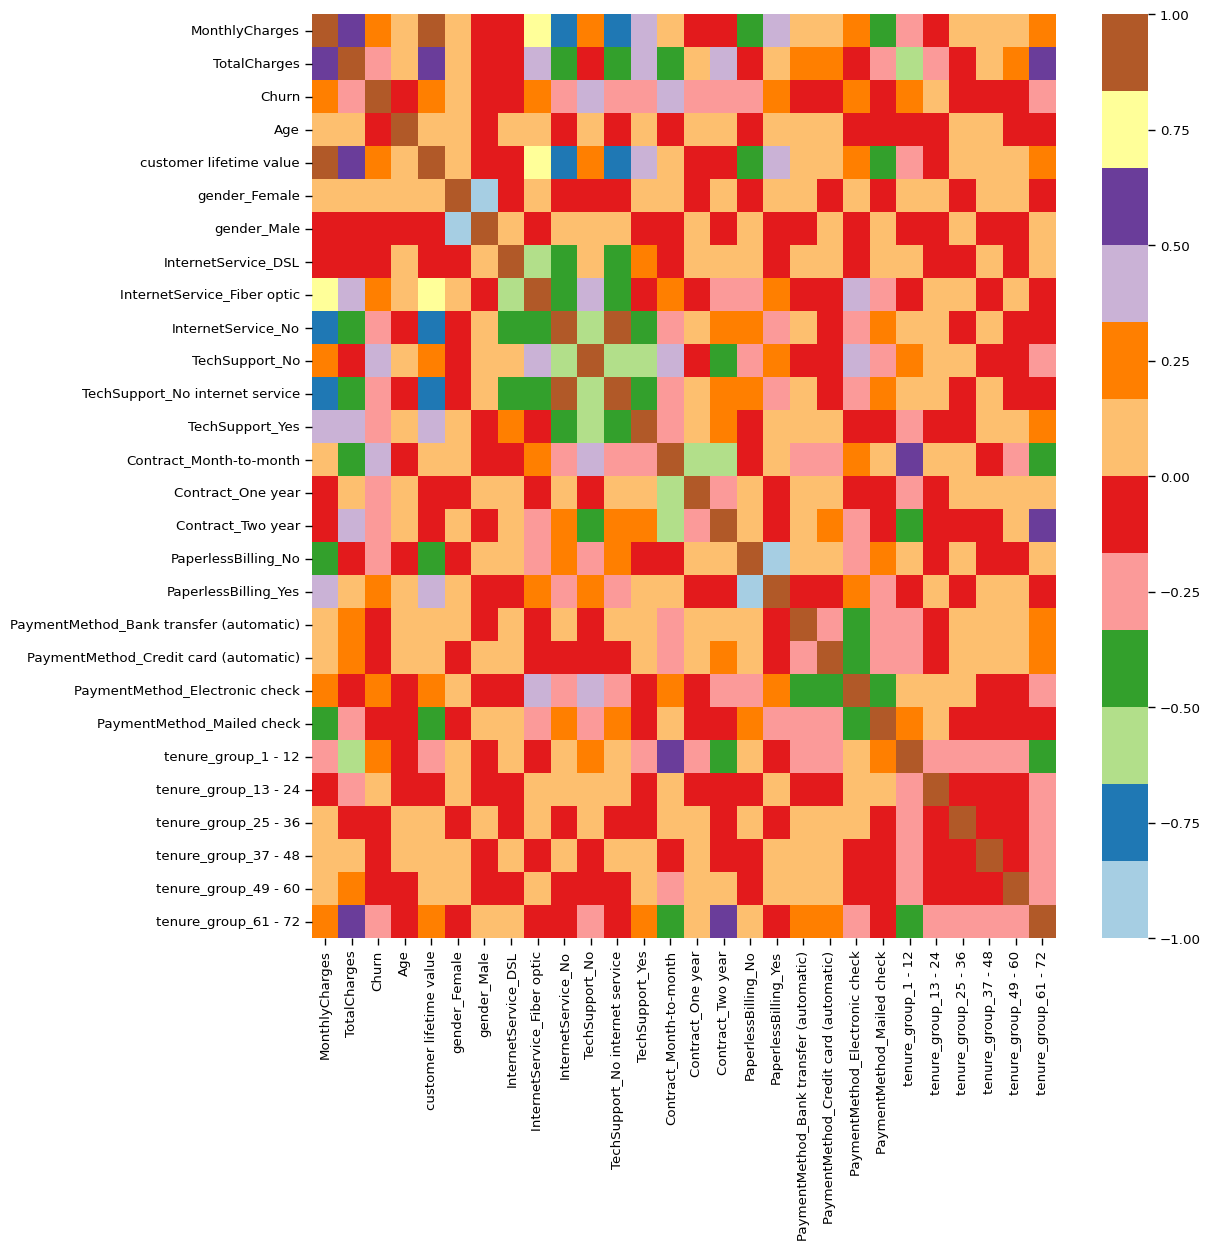

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

In [50]:
telco_data_dummies.to_csv('tel_churn.csv')